In [6]:
!pip install pyspark

In [7]:
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [8]:
spark = SparkSession.builder.appName("tutorial").getOrCreate()

In [9]:
df = spark.read.csv("/content/matches.csv")
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string]

In [10]:
df.show()

+----+----------+-----+--------------+------------+---+-----+------+---+---+---------------+----+----+----+----------+---------------+---------+--------------+------------+-----+----+----+----+----+----+-----+------+---------------+
| _c0|       _c1|  _c2|           _c3|         _c4|_c5|  _c6|   _c7|_c8|_c9|           _c10|_c11|_c12|_c13|      _c14|           _c15|     _c16|          _c17|        _c18| _c19|_c20|_c21|_c22|_c23|_c24| _c25|  _c26|           _c27|
+----+----------+-----+--------------+------------+---+-----+------+---+---+---------------+----+----+----+----------+---------------+---------+--------------+------------+-----+----+----+----+----+----+-----+------+---------------+
|NULL|      date| time|          comp|       round|day|venue|result| gf| ga|       opponent|  xg| xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist|  fk|  pk|pkatt|season|           team|
|   1|2023-08-11|20:00|Premier League| Matchweek 1|Fri| Away|     W|

**options('header','true) to specify that the first row is the header**



In [11]:
df = spark.read.option('header','true').csv("/content/matches.csv")
df

DataFrame[_c0: string, date: string, time: string, comp: string, round: string, day: string, venue: string, result: string, gf: string, ga: string, opponent: string, xg: string, xga: string, poss: string, attendance: string, captain: string, formation: string, referee: string, match report: string, notes: string, sh: string, sot: string, dist: string, fk: string, pk: string, pkatt: string, season: string, team: string]

In [12]:
df.show()

+---+----------+-----+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+
|_c0|      date| time|          comp|       round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|           team|
+---+----------+-----+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+
|  1|2023-08-11|20:00|Premier League| Matchweek 1|Fri| Away|     W|  3|  0|        Burnley|1.9|0.3|65.0|   21572.0|Kevin De Bruyne|  4-2-3-1|  Craig Pawson|Match Report| NULL|17.0| 8.0|13.9|0.0|  0|    0|  2024|Manchester City|
|  3|2023-08-19|20:00|Premier League| Matchweek 2|Sat| Home|     W|  1|  0|  Newcastle U

In [13]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- date: string (nullable = true)
 |-- time: string (nullable = true)
 |-- comp: string (nullable = true)
 |-- round: string (nullable = true)
 |-- day: string (nullable = true)
 |-- venue: string (nullable = true)
 |-- result: string (nullable = true)
 |-- gf: string (nullable = true)
 |-- ga: string (nullable = true)
 |-- opponent: string (nullable = true)
 |-- xg: string (nullable = true)
 |-- xga: string (nullable = true)
 |-- poss: string (nullable = true)
 |-- attendance: string (nullable = true)
 |-- captain: string (nullable = true)
 |-- formation: string (nullable = true)
 |-- referee: string (nullable = true)
 |-- match report: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- sh: string (nullable = true)
 |-- sot: string (nullable = true)
 |-- dist: string (nullable = true)
 |-- fk: string (nullable = true)
 |-- pk: string (nullable = true)
 |-- pkatt: string (nullable = true)
 |-- season: string (nullable = true)
 |

**Everything is a string. to fix that, use inferschema**

In [14]:
df = spark.read.option('header','true').csv("/content/matches.csv", inferSchema=True)
df
#you could also use df = spark.read.csv("/content/matches.csv", header= True, inferSchema=True)

DataFrame[_c0: int, date: date, time: timestamp, comp: string, round: string, day: string, venue: string, result: string, gf: int, ga: int, opponent: string, xg: double, xga: double, poss: double, attendance: double, captain: string, formation: string, referee: string, match report: string, notes: string, sh: double, sot: double, dist: double, fk: double, pk: int, pkatt: int, season: int, team: string]

In [15]:

df.columns

['_c0',
 'date',
 'time',
 'comp',
 'round',
 'day',
 'venue',
 'result',
 'gf',
 'ga',
 'opponent',
 'xg',
 'xga',
 'poss',
 'attendance',
 'captain',
 'formation',
 'referee',
 'match report',
 'notes',
 'sh',
 'sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'season',
 'team']

In [16]:
df.head(3)

[Row(_c0=1, date=datetime.date(2023, 8, 11), time=datetime.datetime(2024, 6, 21, 20, 0), comp='Premier League', round='Matchweek 1', day='Fri', venue='Away', result='W', gf=3, ga=0, opponent='Burnley', xg=1.9, xga=0.3, poss=65.0, attendance=21572.0, captain='Kevin De Bruyne', formation='4-2-3-1', referee='Craig Pawson', match report='Match Report', notes=None, sh=17.0, sot=8.0, dist=13.9, fk=0.0, pk=0, pkatt=0, season=2024, team='Manchester City'),
 Row(_c0=3, date=datetime.date(2023, 8, 19), time=datetime.datetime(2024, 6, 21, 20, 0), comp='Premier League', round='Matchweek 2', day='Sat', venue='Home', result='W', gf=1, ga=0, opponent='Newcastle Utd', xg=1.0, xga=0.3, poss=59.0, attendance=53419.0, captain='Kyle Walker', formation='4-2-3-1', referee='Robert Jones', match report='Match Report', notes=None, sh=14.0, sot=4.0, dist=17.9, fk=0.0, pk=0, pkatt=0, season=2024, team='Manchester City'),
 Row(_c0=4, date=datetime.date(2023, 8, 27), time=datetime.datetime(2024, 6, 21, 14, 0), com

In [17]:
df.select('team').show()

+---------------+
|           team|
+---------------+
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
|Manchester City|
+---------------+
only showing top 20 rows



**Notice the [] for multiple features**

In [18]:
df.select(['team','opponent']).show()

+---------------+---------------+
|           team|       opponent|
+---------------+---------------+
|Manchester City|        Burnley|
|Manchester City|  Newcastle Utd|
|Manchester City|  Sheffield Utd|
|Manchester City|         Fulham|
|Manchester City|       West Ham|
|Manchester City|Nott'ham Forest|
|Manchester City|         Wolves|
|Manchester City|        Arsenal|
|Manchester City|       Brighton|
|Manchester City| Manchester Utd|
|Manchester City|    Bournemouth|
|Manchester City|        Chelsea|
|Manchester City|      Liverpool|
|Manchester City|      Tottenham|
|Manchester City|    Aston Villa|
|Manchester City|     Luton Town|
|Manchester City| Crystal Palace|
|Manchester City|        Everton|
|Manchester City|  Sheffield Utd|
|Manchester City|  Newcastle Utd|
+---------------+---------------+
only showing top 20 rows



In [19]:
df.describe()

DataFrame[summary: string, _c0: string, comp: string, round: string, day: string, venue: string, result: string, gf: string, ga: string, opponent: string, xg: string, xga: string, poss: string, attendance: string, captain: string, formation: string, referee: string, match report: string, notes: string, sh: string, sot: string, dist: string, fk: string, pk: string, pkatt: string, season: string, team: string]

In [20]:
df.describe().show()

+-------+------------------+--------------+-----------+----+-----+------+------------------+------------------+--------+------------------+------------------+------------------+------------------+----------------+---------+---------------+------------+-----+-----------------+------------------+------------------+------------------+-------------------+-------------------+------------------+--------------------+
|summary|               _c0|          comp|      round| day|venue|result|                gf|                ga|opponent|                xg|               xga|              poss|        attendance|         captain|formation|        referee|match report|notes|               sh|               sot|              dist|                fk|                 pk|              pkatt|            season|                team|
+-------+------------------+--------------+-----------+----+-----+------+------------------+------------------+--------+------------------+------------------+--------------

In [21]:
df = df.withColumn("goal_difference", df['gf']-df['ga'])


In [22]:
df.show()

+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+---------------+
|_c0|      date|               time|          comp|       round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|           team|goal_difference|
+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+---------------+
|  1|2023-08-11|2024-06-21 20:00:00|Premier League| Matchweek 1|Fri| Away|     W|  3|  0|        Burnley|1.9|0.3|65.0|   21572.0|Kevin De Bruyne|  4-2-3-1|  Craig Pawson|Match Report| NULL|17.0| 8.0|13.9|0.0|  0|    0|  2024|M

In [23]:
df = df.withColumnRenamed('goal_difference','gd')
df.show()

+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+---+
|_c0|      date|               time|          comp|       round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|           team| gd|
+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+---+
|  1|2023-08-11|2024-06-21 20:00:00|Premier League| Matchweek 1|Fri| Away|     W|  3|  0|        Burnley|1.9|0.3|65.0|   21572.0|Kevin De Bruyne|  4-2-3-1|  Craig Pawson|Match Report| NULL|17.0| 8.0|13.9|0.0|  0|    0|  2024|Manchester City|  3|
|  3|2023-08-19|

In [24]:
df = df.drop('gd')
df.show()

+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+
|_c0|      date|               time|          comp|       round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|           team|
+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+
|  1|2023-08-11|2024-06-21 20:00:00|Premier League| Matchweek 1|Fri| Away|     W|  3|  0|        Burnley|1.9|0.3|65.0|   21572.0|Kevin De Bruyne|  4-2-3-1|  Craig Pawson|Match Report| NULL|17.0| 8.0|13.9|0.0|  0|    0|  2024|Manchester City|
|  3|2023-08-19|2024-06-21 20:00

In [25]:
df = spark.read.csv("/content/matches.csv", header= True, inferSchema=True)

**There is no nulls actually**

In [26]:
# this drops any row which has a null value
df.na.drop().show() #equivalent of how='any'

#this drops only if the whole row is null
df.na.drop(how='all')

#this drops any rows which do not have data in at least [threshold] cells
df.na.drop(how='any',thresh=2)

#this will drop any rows which have the team cell null
df.na.drop(how='any',subset=['team'])


+---+----+----+----+-----+---+-----+------+---+---+--------+---+---+----+----------+-------+---------+-------+------------+-----+---+---+----+---+---+-----+------+----+
|_c0|date|time|comp|round|day|venue|result| gf| ga|opponent| xg|xga|poss|attendance|captain|formation|referee|match report|notes| sh|sot|dist| fk| pk|pkatt|season|team|
+---+----+----+----+-----+---+-----+------+---+---+--------+---+---+----+----------+-------+---------+-------+------------+-----+---+---+----+---+---+-----+------+----+
+---+----+----+----+-----+---+-----+------+---+---+--------+---+---+----+----------+-------+---------+-------+------------+-----+---+---+----+---+---+-----+------+----+



DataFrame[_c0: int, date: date, time: timestamp, comp: string, round: string, day: string, venue: string, result: string, gf: int, ga: int, opponent: string, xg: double, xga: double, poss: double, attendance: double, captain: string, formation: string, referee: string, match report: string, notes: string, sh: double, sot: double, dist: double, fk: double, pk: int, pkatt: int, season: int, team: string]

In [27]:
df.na.fill("Missing value", subset = ['team'])

DataFrame[_c0: int, date: date, time: timestamp, comp: string, round: string, day: string, venue: string, result: string, gf: int, ga: int, opponent: string, xg: double, xga: double, poss: double, attendance: double, captain: string, formation: string, referee: string, match report: string, notes: string, sh: double, sot: double, dist: double, fk: double, pk: int, pkatt: int, season: int, team: string]

**This will create new columns of input columns which are the same except, it replaces any null values with the mean it calculates for the column**

In [28]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols = ['sh','sot'],
    outputCols = ["{}_imputed".format(c) for c in ['sh','sot']]
).setStrategy("mean")

imputer.fit(df).transform(df).show()

+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+----------+-----------+
|_c0|      date|               time|          comp|       round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|           team|sh_imputed|sot_imputed|
+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+----------+-----------+
|  1|2023-08-11|2024-06-21 20:00:00|Premier League| Matchweek 1|Fri| Away|     W|  3|  0|        Burnley|1.9|0.3|65.0|   21572.0|Kevin De Bruyne|  4-2-3-1|  Craig Pawson|Match Report| NULL|17.0| 8.0|13.9|0

In [29]:
#df.filter("gf>5").select(['team','opponent']).show()
df.filter(df['gf']>5).select(['date' , 'team','gf' , 'ga' , 'opponent']).show()

#both work the same

+----------+--------------------+---+---+---------------+
|      date|                team| gf| ga|       opponent|
+----------+--------------------+---+---+---------------+
|2023-11-04|     Manchester City|  6|  1|    Bournemouth|
|2024-02-11|             Arsenal|  6|  0|       West Ham|
|2024-03-04|             Arsenal|  6|  0|  Sheffield Utd|
|2023-09-30|         Aston Villa|  6|  1|       Brighton|
|2024-04-15|             Chelsea|  6|  0|        Everton|
|2023-09-24|    Newcastle United|  8|  0|  Sheffield Utd|
|2022-08-31|     Manchester City|  6|  0|Nott'ham Forest|
|2022-10-02|     Manchester City|  6|  3| Manchester Utd|
|2023-04-23|    Newcastle United|  6|  1|      Tottenham|
|2022-08-27|           Liverpool|  9|  0|    Bournemouth|
|2023-03-05|           Liverpool|  7|  0| Manchester Utd|
|2023-04-17|           Liverpool|  6|  1|   Leeds United|
|2023-04-29|Brighton and Hove...|  6|  0|         Wolves|
|2022-09-17|   Tottenham Hotspur|  6|  2| Leicester City|
|2021-12-14|  

**Exciting matches with lots of goals**

In [30]:
df.filter((df['gf']>=5) & (df['ga']>=3)).select(['team','gf','ga','opponent','date']).show()


+---------------+---+---+--------------+----------+
|           team| gf| ga|      opponent|      date|
+---------------+---+---+--------------+----------+
|Manchester City|  6|  3|Manchester Utd|2022-10-02|
|         Fulham|  5|  3|Leicester City|2023-05-08|
|Manchester City|  6|  3|Leicester City|2021-12-26|
+---------------+---+---+--------------+----------+



In [31]:
df.filter(df['gf'] + df['ga'] >=8).select(['team','gf','ga','opponent','date']).show()


+-----------------+---+---+---------------+----------+
|             team| gf| ga|       opponent|      date|
+-----------------+---+---+---------------+----------+
|  Manchester City|  4|  4|        Chelsea|2023-11-12|
|          Chelsea|  4|  4|Manchester City|2023-11-12|
| Newcastle United|  8|  0|  Sheffield Utd|2023-09-24|
| Newcastle United|  4|  4|     Luton Town|2024-02-03|
|       Luton Town|  4|  4|  Newcastle Utd|2024-02-03|
| Sheffield United|  0|  8|  Newcastle Utd|2023-09-24|
|  Manchester City|  6|  3| Manchester Utd|2022-10-02|
|Manchester United|  3|  6|Manchester City|2022-10-02|
|        Liverpool|  9|  0|    Bournemouth|2022-08-27|
|        Liverpool|  4|  4|    Southampton|2023-05-28|
|Tottenham Hotspur|  6|  2| Leicester City|2022-09-17|
|           Fulham|  5|  3| Leicester City|2023-05-08|
|      Bournemouth|  0|  9|      Liverpool|2022-08-27|
|   Leicester City|  2|  6|      Tottenham|2022-09-17|
|   Leicester City|  3|  5|         Fulham|2023-05-08|
|      Sou

Most attended matches

In [32]:
df.orderBy(col('attendance').desc()).limit(20).select(['date','round', 'team','gf','ga','opponent','attendance']).show()

+----------+------------+--------------------+---+---+---------------+----------+
|      date|       round|                team| gf| ga|       opponent|attendance|
+----------+------------+--------------------+---+---+---------------+----------+
|2023-01-14|Matchweek 20|   Manchester United|  2|  1|Manchester City|   75546.0|
|2023-01-14|Matchweek 20|     Manchester City|  1|  2| Manchester Utd|   75546.0|
|2022-08-22| Matchweek 3|   Manchester United|  2|  1|      Liverpool|   74147.0|
|2022-08-22| Matchweek 3|           Liverpool|  1|  2| Manchester Utd|   74147.0|
|2022-10-16|Matchweek 11|    Newcastle United|  0|  0| Manchester Utd|   73726.0|
|2022-10-16|Matchweek 11|   Manchester United|  0|  0|  Newcastle Utd|   73726.0|
|2022-08-07| Matchweek 1|   Manchester United|  1|  2|       Brighton|   73711.0|
|2022-08-07| Matchweek 1|Brighton and Hove...|  2|  1| Manchester Utd|   73711.0|
|2022-10-30|Matchweek 14|   Manchester United|  1|  0|       West Ham|   73682.0|
|2022-10-30|Matc

In [33]:
filtered_df = df.filter((col('team') == 'Liverpool') & (col('opponent') == 'Wolves'))

# Select the 'attendance' column and show the result
filtered_df.select('date','attendance').show()

+----------+----------+
|      date|attendance|
+----------+----------+
|2023-09-16|   31257.0|
|2024-05-19|   60059.0|
|2023-02-04|   31664.0|
|2023-03-01|   53259.0|
|2021-12-04|   30729.0|
|2022-05-22|   53097.0|
+----------+----------+



**Sum of goals per team**

In [34]:
from pyspark.sql.functions import col

df.groupBy('team').sum('gf','ga').orderBy(col('sum(gf)').desc()).show()

+--------------------+-------+-------+
|                team|sum(gf)|sum(ga)|
+--------------------+-------+-------+
|     Manchester City|    289|     93|
|           Liverpool|    255|    114|
|             Arsenal|    240|    120|
|   Tottenham Hotspur|    213|    164|
|    Newcastle United|    197|    157|
|             Chelsea|    191|    143|
|         Aston Villa|    179|    161|
|   Manchester United|    172|    158|
|Brighton and Hove...|    169|    159|
|           Brentford|    162|    167|
|     West Ham United|    162|    180|
|      Crystal Palace|    147|    153|
|Wolverhampton Wan...|    119|    166|
|             Everton|    117|    174|
|      Leicester City|    113|    127|
|              Fulham|    110|    114|
|         Bournemouth|     91|    138|
|        Leeds United|     90|    157|
|   Nottingham Forest|     87|    135|
|         Southampton|     79|    140|
+--------------------+-------+-------+
only showing top 20 rows



**Mean goals scored of every team per match**

In [35]:
df.groupBy('team').mean('gf').orderBy(col('avg(gf)').desc()).show()

+--------------------+------------------+
|                team|           avg(gf)|
+--------------------+------------------+
|     Manchester City|2.5350877192982457|
|           Liverpool| 2.236842105263158|
|             Arsenal|2.1052631578947367|
|   Tottenham Hotspur| 1.868421052631579|
|    Newcastle United|1.7280701754385965|
|             Chelsea|1.6754385964912282|
|         Aston Villa|1.5701754385964912|
|   Manchester United|1.5087719298245614|
|      Leicester City| 1.486842105263158|
|Brighton and Hove...|1.4824561403508771|
|              Fulham|1.4473684210526316|
|           Brentford|1.4210526315789473|
|     West Ham United|1.4210526315789473|
|          Luton Town| 1.368421052631579|
|      Crystal Palace|1.2894736842105263|
|         Bournemouth|1.1973684210526316|
|        Leeds United|1.1842105263157894|
|   Nottingham Forest| 1.144736842105263|
|Wolverhampton Wan...| 1.043859649122807|
|         Southampton|1.0394736842105263|
+--------------------+------------

**Each team's max goal in a match**

In [36]:
df.groupBy('team').max('gf').orderBy(col('max(gf)').desc()).show()

+--------------------+-------+
|                team|max(gf)|
+--------------------+-------+
|           Liverpool|      9|
|    Newcastle United|      8|
|     Manchester City|      7|
|             Chelsea|      7|
|             Arsenal|      6|
|         Aston Villa|      6|
|   Tottenham Hotspur|      6|
|Brighton and Hove...|      6|
|   Manchester United|      5|
|           Brentford|      5|
|      Crystal Palace|      5|
|             Burnley|      5|
|              Fulham|      5|
|      Leicester City|      5|
|             Watford|      5|
|             Everton|      5|
|        Leeds United|      4|
|         Bournemouth|      4|
|   Nottingham Forest|      4|
|         Southampton|      4|
+--------------------+-------+
only showing top 20 rows



**Sum of all goals in the premier league's three seasons**

In [37]:
df.agg({'gf':'sum'}).show()

+-------+
|sum(gf)|
+-------+
|   3401|
+-------+



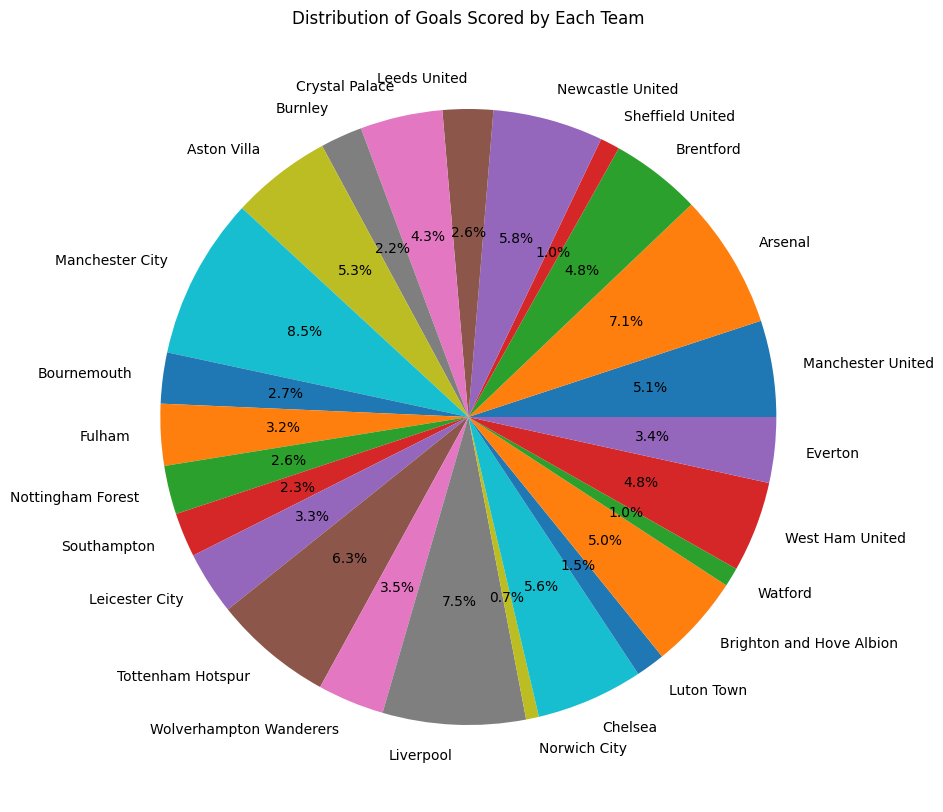

In [46]:

import matplotlib.pyplot as plt

team_gf_sum = df.groupBy('team').sum('gf').toPandas()

plt.figure(figsize=(10, 10))

plt.pie(team_gf_sum['sum(gf)'], labels=team_gf_sum['team'], autopct='%1.1f%%')
plt.title('Distribution of Goals Scored by Each Team')
plt.show()


# Time for ML

In [ ]:
df.columns

['_c0',
 'date',
 'time',
 'comp',
 'round',
 'day',
 'venue',
 'result',
 'gf',
 'ga',
 'opponent',
 'xg',
 'xga',
 'poss',
 'attendance',
 'captain',
 'formation',
 'referee',
 'match report',
 'notes',
 'sh',
 'sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'season',
 'team']

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Encode 'team' column
team_indexer = StringIndexer(inputCol="team", outputCol="team_enc")
df = team_indexer.fit(df).transform(df)

# Encode 'opponent' column
opponent_indexer = StringIndexer(inputCol="opponent", outputCol="opponent_enc")
df = opponent_indexer.fit(df).transform(df)


# Show the transformed DataFrame
df.show(5)


+---+----------+-------------------+--------------+-----------+---+-----+------+---+---+-------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+--------+------------+
|_c0|      date|               time|          comp|      round|day|venue|result| gf| ga|     opponent| xg|xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|           team|team_enc|opponent_enc|
+---+----------+-------------------+--------------+-----------+---+-----+------+---+---+-------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+--------+------------+
|  1|2023-08-11|2024-06-09 20:00:00|Premier League|Matchweek 1|Fri| Away|     W|  3|  0|      Burnley|1.9|0.3|65.0|   21572.0|Kevin De Bruyne|  4-2-3-1|  Craig Pawson|Match Report| NULL|17.0| 8.0|13.9|0.0|  0|    0|  

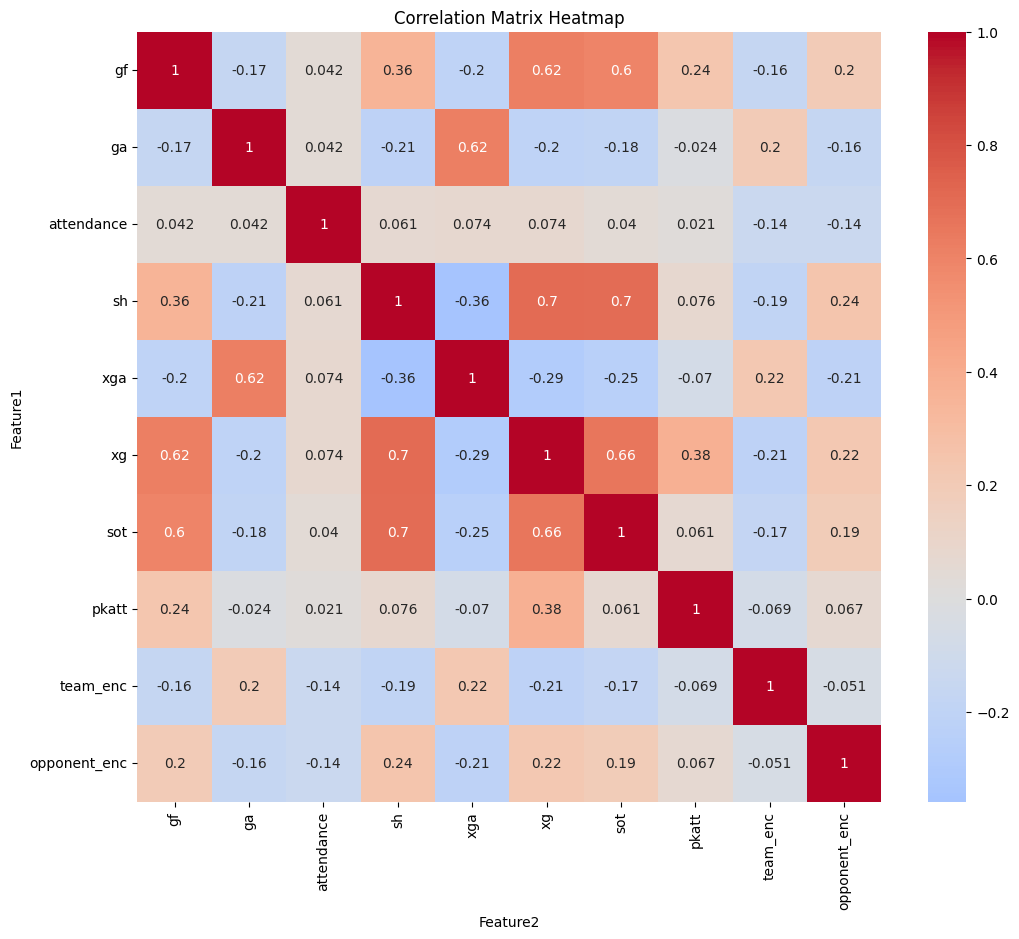

In [ ]:
from pyspark.sql.functions import col
from itertools import combinations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation calculation
numeric_columns = ['gf', 'ga', 'attendance', 'sh', 'xga', 'xg', 'sot', 'pkatt', 'team_enc', 'opponent_enc']

# Initialize an empty list to store correlation results
correlation_results = []

# Calculate correlation between each pair of numeric columns
for col1, col2 in combinations(numeric_columns, 2):
    corr_value = df.stat.corr(col1, col2)
    correlation_results.append((col1, col2, corr_value))
    correlation_results.append((col2, col1, corr_value))  # Add reverse pair for symmetry

# Add diagonal correlations (1.0 for correlation with itself)
for col in numeric_columns:
    correlation_results.append((col, col, 1.0))

# Convert the results to a DataFrame
correlation_df = spark.createDataFrame(correlation_results, ["Feature1", "Feature2", "Correlation"])

# Convert the Spark DataFrame to Pandas DataFrame for visualization
correlation_pandas_df = correlation_df.toPandas()

# Create a pivot table to convert long format to wide format for heatmap
correlation_matrix = correlation_pandas_df.pivot(index='Feature1', columns='Feature2', values='Correlation')

# Ensure the correlation matrix is square by reindexing
correlation_matrix = correlation_matrix.reindex(index=numeric_columns, columns=numeric_columns)

# Plot the heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
from pyspark.ml.feature import VectorAssembler
Assembler = VectorAssembler(inputCols = ["sh","xga" ,"sot","pkatt"],
                            outputCol = "xG_prediction")

In [ ]:
new_df = Assembler.transform(df)
new_df.show()

+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+--------+------------+-------------------+
|_c0|      date|               time|          comp|       round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|        captain|formation|       referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|           team|team_enc|opponent_enc|      xG_prediction|
+---+----------+-------------------+--------------+------------+---+-----+------+---+---+---------------+---+---+----+----------+---------------+---------+--------------+------------+-----+----+----+----+---+---+-----+------+---------------+--------+------------+-------------------+
|  1|2023-08-11|2024-06-09 20:00:00|Premier League| Matchweek 1|Fri| Away|     W|  3|  0|        Burnley|1.9|0.3|65.0|   21572.0|Kevin De Bruyne|  4

In [ ]:
from pyspark.ml.regression import LinearRegression


# Split the data into training and test sets
train_df, test_df = new_df.randomSplit([0.8, 0.2], seed=42)

# Create and train the Linear Regression model
lr = LinearRegression(featuresCol="xG_prediction", labelCol="gf")
lr_model = lr.fit(train_df)

# Make predictions on the test set
goals_predictions = lr_model.transform(test_df)

# Evaluate the model
goals_predictions.show()


+---+----------+-------------------+--------------+-----------+---+-----+------+---+---+---------------+---+---+----+----------+-----------------+---------+---------------+------------+-----+----+----+----+---+---+-----+------+--------------------+--------+------------+-------------------+-------------------+
|_c0|      date|               time|          comp|      round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|          captain|formation|        referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|                team|team_enc|opponent_enc|      xG_prediction|         prediction|
+---+----------+-------------------+--------------+-----------+---+-----+------+---+---+---------------+---+---+----+----------+-----------------+---------+---------------+------------+-----+----+----+----+---+---+-----+------+--------------------+--------+------------+-------------------+-------------------+
|  0|2021-08-14|2024-06-09 12:30:00|Premier League|Matchweek 1|Sat|

In [ ]:
# prompt: add the predictions column to the df, named : xG_Prediction

goals_predictions = goals_predictions.withColumnRenamed("xG_prediction", "xG_Predictor")
goals_predictions = goals_predictions.withColumnRenamed("prediction", "xG_Prediction")
goals_predictions.show()


+---+----------+-------------------+--------------+-----------+---+-----+------+---+---+---------------+---+---+----+----------+-----------------+---------+---------------+------------+-----+----+----+----+---+---+-----+------+--------------------+--------+------------+-------------------+-------------------+
|_c0|      date|               time|          comp|      round|day|venue|result| gf| ga|       opponent| xg|xga|poss|attendance|          captain|formation|        referee|match report|notes|  sh| sot|dist| fk| pk|pkatt|season|                team|team_enc|opponent_enc|       xG_Predictor|      xG_Prediction|
+---+----------+-------------------+--------------+-----------+---+-----+------+---+---+---------------+---+---+----+----------+-----------------+---------+---------------+------------+-----+----+----+----+---+---+-----+------+--------------------+--------+------------+-------------------+-------------------+
|  0|2021-08-14|2024-06-09 12:30:00|Premier League|Matchweek 1|Sat|

In [ ]:
goals_predictions.select("gf", "xg", "xG_prediction").show()

+---+---+-------------------+
| gf| xg|      xG_prediction|
+---+---+-------------------+
|  1|0.5|  1.034273553759352|
|  1|0.8| 1.0734987568965924|
|  2|1.0|  1.968777970689323|
|  0|1.4| 0.8670056333591224|
|  2|1.2| 1.5155108818218044|
|  1|0.5| 0.6712841985580515|
|  0|0.7| 1.1115053780963176|
|  0|0.3|0.41154140512548604|
|  1|1.8| 1.6610692552789768|
|  5|3.3| 3.9924535502127814|
|  2|1.3| 1.7246844199312996|
|  1|1.3|0.20525137857760195|
|  0|2.2| 1.5316048590888862|
|  0|1.8|  1.152356970244286|
|  0|0.5| 0.8639575654212932|
|  0|1.7| 1.5183943933834154|
|  0|1.5|  1.553923697000701|
|  1|2.1| 1.4389268890669646|
|  5|2.6| 1.3448272401179415|
|  2|1.3| 1.2940163471919177|
+---+---+-------------------+
only showing top 20 rows



In [ ]:

from pyspark.ml.evaluation import RegressionEvaluator

# Calculate the mean absolute error (MAE) for both xG and xG_prediction
xG_mae = evaluator.evaluate(goals_predictions, {evaluator.labelCol: "gf", evaluator.predictionCol: "xg"})
xG_prediction_mae = evaluator.evaluate(goals_predictions, {evaluator.labelCol: "gf", evaluator.predictionCol: "xG_Prediction"})

# Print the results
print(f"MAE for xG: {xG_mae}")
print(f"MAE for xG_prediction: {xG_prediction_mae}")

# Compare the MAE values
if xG_mae < xG_prediction_mae:
    print("xG is closer to the truth value (gf)")
else:
    print("xG_prediction is closer to the truth value (gf)")


MAE for xG: 0.8300751879699242
MAE for xG_prediction: 0.7749912473452947
xG_prediction is closer to the truth value (gf)
